
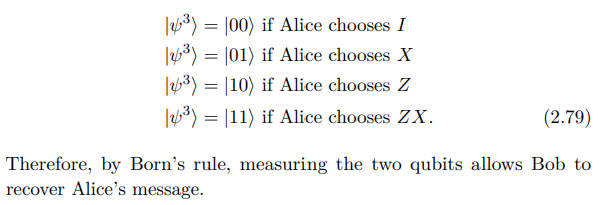
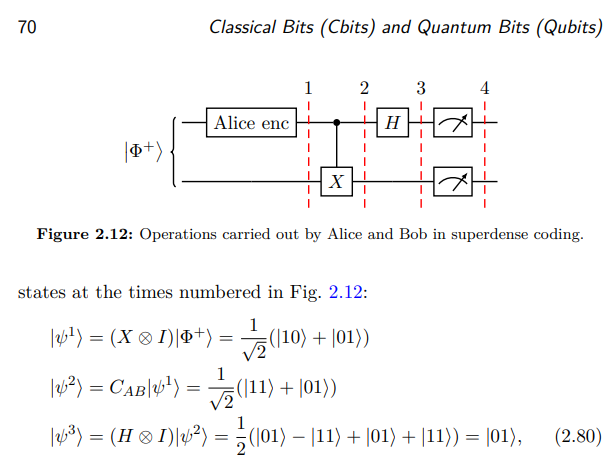
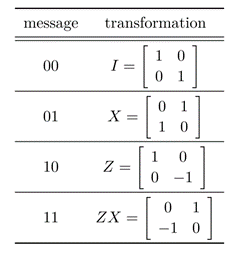

In [1]:
import math
import numpy
import torch
Trans_I =  torch.tensor([[1,0], [0,1]])
Trans_X =  torch.tensor([[0,1], [1,0]])
Trans_Z =  torch.tensor([[1,0], [0,-1]])
Trans_ZX =  torch.tensor([[0,1], [-1,0]])
#원래는 phi+에 루트 1/2 있지만 행렬연산 에러나서 나중에 그냥 1/2 처리
phi_p = torch.tensor([[1], [0], [0], [1]])
#*math.sqrt(2)
CNOT = torch.tensor([[1,0,0,0],[0,1,0,0],[0,0,0,1],[0,0,1,0]])
#하다마드gate도 루트 1/2 있지만 행렬연산 에러나서 나중에 그냥 1/2 처리
HADA = torch.tensor([[1,1], [1,-1]])
#*math.sqrt(2)
HADA_I = torch.kron(HADA, Trans_I)
HADA_I
#elif로
def Superdense_code( i ):
    if i == 0:
        Superdens_Trans = torch.kron(Trans_I,Trans_I)

    elif i == 1:
        Superdens_Trans = torch.kron(Trans_X,Trans_I)

    elif i == 2:
        Superdens_Trans = torch.kron(Trans_Z,Trans_I)

    elif i == 3:
        Superdens_Trans = torch.kron(Trans_ZX,Trans_I)
        
#torch.mm이랑 torch.einsum('ik,kj->ij, [a, b]') 랑 같은역할. 3D 텐서부터는 einsum 써야할듯
    return  torch.mm(HADA_I , torch.mm(CNOT , torch.einsum('ik,kj->ij', [Superdens_Trans , phi_p]))) * 1/2
#math.sqrt(2) 2개는 error나와서 그냥

#transpose 한것. 뒤에 . 붙는건 마지막 * 1/2 해서 나온것.
msg_00 =  torch.einsum("ij->ji", torch.tensor([[1.,0.,0.,0.]]))
msg_01 =  torch.einsum("ij->ji", torch.tensor([[0.,1.,0.,0.]]))
msg_10 =  torch.einsum("ij->ji", torch.tensor([[0.,0.,1.,0.]]))
msg_11 =  torch.einsum("ij->ji", torch.tensor([[0.,0.,0.,1.]]))

def S_Code( i ):
    if torch.equal(Superdense_code(i), msg_00):
        print ("message is 00")
    elif torch.equal(Superdense_code(i), msg_01):
        print ("message is 01")
    elif torch.equal(Superdense_code(i), msg_10):
        print ("message is 10")
    elif torch.equal(Superdense_code(i), msg_11):
        print ("message is 11")

        
S_Code(3)
S_Code(1)
S_Code(2)
S_Code(0)

message is 11
message is 01
message is 10
message is 00


In [ ]:
#추가 공부 사항

torch.tensor([0,0,0]) # rx rotation, ry rotation, rz rotation, cz rx, ry, rz cz 
def get_RX(theta:torch.Tensor):
    return torch.tensor([[torch.cos(theta),-torch.sin(theta)],[torch.sin(theta),torch.cos(theta)]])